In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae

In [238]:
# Getting data

df =  pd.read_csv("futureSalesData.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [239]:
df.shape

(244, 7)

In [240]:
# We can see here that there is not any null elements

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


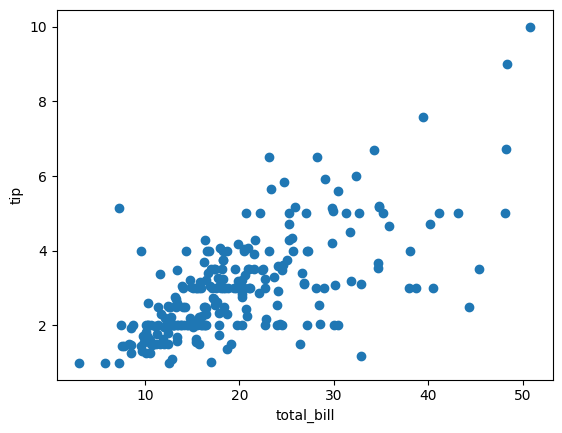

In [242]:
# Visual relationship between feature and target.

plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [243]:
# Next relations weren't usefull, so i decided to show what are the average statistics

df.groupby('size')[['total_bill','tip']].mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [244]:
df.groupby('sex')[['total_bill','tip']].mean()

,total_bill,tip
sex,,
Female,18.056897,2.833448
Male,20.744076,3.089618


In [245]:
df.groupby('time')[['total_bill','tip']].mean()

,total_bill,tip
time,,
Dinner,20.797159,3.102670
Lunch,17.168676,2.728088


In [246]:
df.groupby('day')[['total_bill','tip']].mean()

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


In [247]:
# Converting data to numeric values 

le = LabelEncoder()
  
for col in df.columns:
  if df[col].dtype == object:
    df[col] = le.fit_transform(df[col])
  
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [248]:
# Deviding features from target

X = df[['total_bill','sex','smoker','day','time','size']]
Y = df['tip']

In [249]:
# Spliting data for test and for train

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((195, 6), (49, 6))

In [250]:
# Building our regression model

model_lreg = LinearRegression()

In [251]:
# Fitting our data

model_lreg.fit(x_train,y_train)

LinearRegression()

In [252]:
# Getting accuracy of our model(it is quite low because of a lack of data)
# Max value of this function is 1
model_lreg.score(x_test, y_test)

0.4441368826121931

In [253]:
# Mean squared error value

mean_squared_error(y_test, model_lreg.predict(x_test))

0.6948129686287711

In [254]:
# Exaple of our prediction
# (Total bill; Sex; Smoker; Day; Time; Size)

model_tree.predict([[10,1,1,1,2,2]])

/Users/tumolabsstudent/davs_env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.73])